In [1]:
!pip install split_folders

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import shutil
import PIL
import split_folders
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
path = "../input/ferg-db/FERG_DB_256/"
print(os.listdir(path))

['anger', 'neutral', 'fear', 'joy', 'disgust', 'surprise', 'sad']


In [4]:
split_folders.ratio(path, output="split", seed=1337, ratio=(.7, .2, .1))

Copying files: 55767 files [02:44, 339.34 files/s]


In [5]:
!rm "./split/train/surprise/bonnie_surprise_1389.png"
!rm "./split/val/surprise/bonnie_surprise_1389.png"
!rm "./split/test/surprise/bonnie_surprise_1389.png"

rm: cannot remove './split/val/surprise/bonnie_surprise_1389.png': No such file or directory
rm: cannot remove './split/test/surprise/bonnie_surprise_1389.png': No such file or directory


In [6]:
print(os.listdir("./split"))
path = "./split"

['test', 'val', 'train']


In [7]:
print(os.listdir("./split/train/"))

['sad', 'surprise', 'disgust', 'neutral', 'anger', 'fear', 'joy']


In [8]:
labels = ['anger','sad', 'fear', 'disgust', 'surprise', 'joy', 'neutral']

**Constants**

In [9]:
img_height = 128
img_width = 128
img_channels = 3
batch_size = 32
epochs = 35

In [10]:
TRAIN_DIR = "./split/train/"
print(TRAIN_DIR)
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    zoom_range = 0.2,
    shear_range = 0.1,
    fill_mode = 'reflect',
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

./split/train/
Found 39033 images belonging to 7 classes.


anger 6418
sad 5338
fear 5193
disgust 5999
surprise 6097
joy 5131
neutral 4857


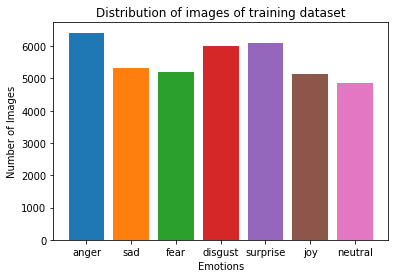

In [11]:
sum = 0
for val in labels:
    count = len(os.listdir("./split/train/" + val))
    sum = sum + count
    print(val,count)
    plt.bar(val,count)
    plt.xlabel('Emotions')
    plt.ylabel('Number of Images')
    plt.title('Distribution of images of training dataset')
train_size = sum    

In [12]:
VAL_DIR = "./split/val/"
print(VAL_DIR)
val_datagen = ImageDataGenerator(
    rescale = 1./255,
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

./split/val/
Found 11150 images belonging to 7 classes.


anger 1833
sad 1525
fear 1483
disgust 1714
surprise 1742
joy 1466
neutral 1387


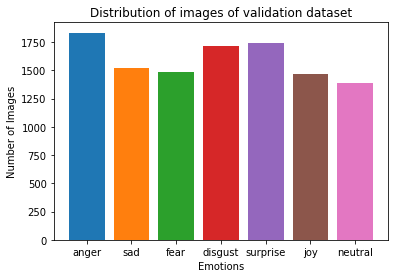

In [13]:
sum = 0
for val in labels:
    count = len(os.listdir("./split/val/" + val))
    sum = sum + count
    print(val,count)
    plt.bar(val,count)
    plt.xlabel('Emotions')
    plt.ylabel('Number of Images')
    plt.title('Distribution of images of validation dataset')    
val_size = sum    

In [14]:
TEST_DIR = "./split/test/"
print(TEST_DIR)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

./split/test/
Found 5583 images belonging to 7 classes.


anger 918
sad 764
fear 743
disgust 858
surprise 872
joy 733
neutral 695


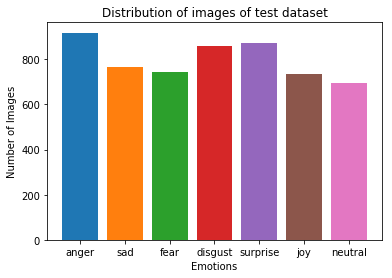

In [15]:
sum = 0
for val in labels:
    count = len(os.listdir("./split/test/" + val))
    sum = sum + count
    print(val,count)
    plt.bar(val,count)
    plt.xlabel('Emotions')
    plt.ylabel('Number of Images')
    plt.title('Distribution of images of test dataset')        
test_size = sum    

In [16]:
model = Sequential()
input_shape = (img_height,img_width,img_channels)

model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu",padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu",padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu",padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu",padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu",padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu",padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=7, activation="softmax"))

In [17]:
opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer= opt)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)      

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.1,
                                            min_lr = 0.0000001,
                                            verbose = 1)

In [21]:
path_model='model_filter.h5' 
# fit the model
hist = model.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data = val_generator,
    steps_per_epoch = train_size//batch_size,
    validation_steps = val_size//batch_size,
    callbacks = [
        ModelCheckpoint(filepath=path_model),
        learning_rate_reduction,
    ]
)

Epoch 1/35
1219/1219 [==============================] - 293s 240ms/step - loss: 1.9420 - accuracy: 0.1629 - val_loss: 1.8336 - val_accuracy: 0.1708
Epoch 2/35
1219/1219 [==============================] - 289s 237ms/step - loss: 1.5930 - accuracy: 0.3316 - val_loss: 0.2618 - val_accuracy: 0.9044
Epoch 3/35
1219/1219 [==============================] - 289s 237ms/step - loss: 0.1385 - accuracy: 0.9524 - val_loss: 3.5907e-04 - val_accuracy: 0.9992
Epoch 4/35
1219/1219 [==============================] - 290s 238ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 9.4320e-06 - val_accuracy: 0.9977
Epoch 5/35
1219/1219 [==============================] - 288s 237ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 2.6077e-08 - val_accuracy: 1.0000
Epoch 6/35
1219/1219 [==============================] - 289s 237ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 1.9521e-04 - val_accuracy: 1.0000
Epoch 7/35
1219/1219 [==============================] - 288s 237ms/step - loss: 0.0028 - accurac

In [22]:
model.save('model.h5')

In [23]:
# import matplotlib.pyplot as plt
# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [24]:
score = model.evaluate_generator(train_generator)
print(score[1]*100)

99.99743700027466


In [25]:
score = model.evaluate_generator(val_generator)
print(score[1]*100)

100.0


In [26]:
score = model.evaluate_generator(test_generator)
print(score[1]*100)

100.0


In [27]:
# y_predict = model.predict_generator(test_generator)
# y_predict = np.argmax(y_predict)
# y_predict = y_predict.flatten()

In [28]:
# x = test_generator.classes
# x = np.array(x)

In [29]:
# # res = model.predict(X_val)
# # n_classes = 7
# # cnf = np.zeros(shape=(n_classes, n_classes))
# # for i in range(len(res)):
# #     if (np.argmax(Y_val[i]) != np.argmax(res[i])):
# #         cnf[np.argmax(Y_val[i])][np.argmax(res[i])] += 1
# # print(cnf)
# cnf = confusion_matrix(x,y_predict)

# f = plt.figure(figsize=(15,15))
# ax = f.add_subplot(111)

# sns.heatmap(cnf, annot=True, ax = ax);
# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels');
# ax.set_title('Confusion Matrix');
# ax.xaxis.set_ticklabels(labels.values())
# ax.yaxis.set_ticklabels(labels.values())

In [30]:
# def emotion_analysis(emotions):
#     objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#     y_pos = np.arange(len(objects))
    
#     plt.bar(y_pos, emotions, align='center', alpha=0.5)
#     plt.xticks(y_pos, objects)
#     plt.ylabel('percentage')
#     plt.title('emotion')
    
# plt.show()

In [31]:
# from skimage import io
# img = image.load_img('./anger.png', grayscale=True, target_size=(48, 48))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis = 0)

# x /= 255

# custom = model.predict(x)
# emotion_analysis(custom[0])

# x = np.array(x, 'float32')
# x = x.reshape([48, 48]);

# plt.gray()
# plt.imshow(x)
# plt.show()

In [32]:
# img = image.load_img('./anger.png', grayscale=True, target_size=(48, 48))

In [33]:
shutil.rmtree("./split")